In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [93]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [94]:
init_notebook_mode(connected=True)
cf.go_offline()

In [95]:
df=pd.read_csv('BITUMEN.csv')

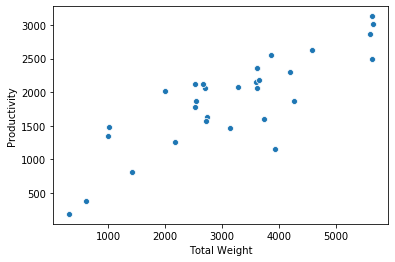

In [96]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [97]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,19.000000
mean,967.483871,194854.064516,36.404516,43.863226,3180.759806,0.033548,0.003355,0.0,3.999032,2.379677,1899.844194,5171.897000
std,344.662334,4302.046389,17.153985,26.069988,1445.455397,0.015609,0.001561,0.0,10.758184,8.483927,688.356333,2077.534331
min,506.000000,190986.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.0,0.000000,0.000000,189.310000,3347.870000
25%,820.500000,191444.000000,30.785000,35.545000,2528.278500,0.030000,0.003000,0.0,0.000000,0.000000,1529.395000,3963.220000
50%,970.000000,192031.000000,40.270000,42.420000,3282.167000,0.030000,0.003000,0.0,0.000000,0.000000,2054.970000,4059.570000
75%,1062.500000,200344.000000,43.475000,52.790000,3899.518500,0.040000,0.004000,0.0,3.290000,0.390000,2329.990000,6392.000000
max,1623.000000,200875.000000,82.000000,127.030000,5660.969000,0.060000,0.006000,0.0,56.900000,42.600000,3128.620000,10767.700000


In [98]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [99]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
print(lm.intercept_)

728.6244065229848


In [101]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.371835


In [102]:
predictions = lm.predict(X_test)

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 405.6143450849008
MSE: 228713.50201039948
RMSE: 478.24000461107335
r2_score: 0.5902262793613986


In [104]:
joblib.dump(lm,"Bitumen.pkl")#only execute if rmse is less than half of mean of productivity

['Bitumen.pkl']

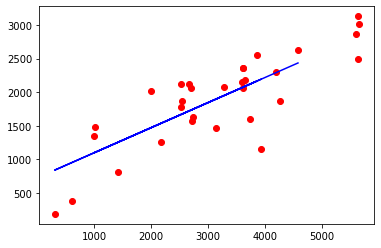

In [105]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")